<a href="https://colab.research.google.com/github/ishikaa25/LST/blob/master/UNIT/LST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

.


In [ ]:
import torch
import torchvision
from torchvision import datasets, transforms
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np


# Data Preprocess (Mini-MNIST)

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
trainset = datasets.MNIST('PATH_TO_STORE_TRAINSET', train=True, transform=transform)

In [ ]:
sub = list(range(0, int(len(trainset)/1000)))
trainset_sub = torch.utils.data.Subset(trainset, sub)


trainloader_1 = torch.utils.data.DataLoader(trainset_sub, batch_size=60,
                                            shuffle=True, num_workers=2)

print(len(trainset_sub))

60


torch.Size([64, 1, 28, 28])
torch.Size([64])


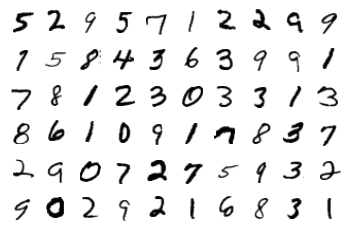

In [ ]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)
figure = plt.figure()

num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [ ]:
X = next(iter(trainloader_1))[0].numpy()

In [ ]:
X.shape

(60, 1, 28, 28)

In [ ]:
X = X.reshape(X.shape[0], X.shape[2], X.shape[3], 1)

# VAE (encoder-only) part

In [ ]:
img_height   = X.shape[1]    # 28
img_width    = X.shape[2]    # 28
num_channels = X.shape[3]    # 1
input_shape =  (img_height, img_width, num_channels)   # (28,28,1)
latent_dim = 2    # Dimension of the latent space